Nom: Fadhlaoui   
Prénom: Mohamed Khalil   
E-mail: mohamed.khalil.fadhlaoui@essai.ucar.tn    
Matricule: 14774451      

# Projet de Programmation Mathématique

Vous devez remettre un rapport individuel au plus tard dimanche le 30 avril 2023 avant 23h59, dans Google Classroom, sous la forme d'un fichier électronique de format IPYNB, nommé ``NomPrenom.ipynb``. Le rapport doit contenir votre nom, prénom, matricule d'étudiant, et email institutionnel. Aucune remise papier ou par courriel ne sera acceptée. La note zéro sera attribuée à toute remise qui ne respecte pas les directives.   

Pour vos analyses, vous devez d'abord obtenir avec votre matricule d'étudiant un ensemble personnalisé de données. Toutes vos réponses doivent correspondre à votre ensemble de données.   

Chacune de vos réponses doit être complète, expliquée et justifiée. Lors de la correction, il sera tenu compte de la qualité de la présentation, la pertinence des analyses et l'initiative dont vous ferez preuve dans votre rapport. Sur les 20 points, 18 sont alloués aux analyses, commentaires pertinents, etc. et 2 à la présentation. Les analyses, les tableaux et les graphiques du rapport doivent être produits avec le logiciel ``Python``. Tout cas de plagiat sera sévèrement sanctionné, ainsi qu'une note 0 à ce devoir.


# Contribution de l'élève

**Inroduction**

This project is based on a research done in Yonsei University Medical College, in Seoul, South Korea.
Despite the decline in mortality from cardiovascular disease since 1970 in most industrialized countries, cardiovascular disease (CVD) and coronary heart disease in particular, are still the leading causes of death.
The goal of this study is to describe the genetic contribution to cardiovascular disease. In order to achieve that, we will take a look at the Familial Correlation and Heritability for Cardiovascular Risk Factors.

In [ ]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the data
df = pd.read_csv('data.csv')
df

,family_id,gender,role,age,height,weight,SBP,DBP,Cholesterol,BMI
0,1589,male,child,45.72,168.67,75.50,142.39,81.15,194.28,26.54
1,1282,male,parent,85.00,169.93,70.39,120.88,61.28,177.12,24.38
2,780,male,child,54.53,165.28,64.55,109.76,71.47,140.50,23.63
3,686,female,parent,40.00,164.86,50.70,131.71,73.06,199.41,18.65
4,1790,male,parent,70.20,160.53,73.37,106.19,95.50,200.03,28.47
...,...,...,...,...,...,...,...,...,...,...
7584,7,male,parent,40.36,165.02,52.28,130.92,88.32,165.05,19.20
7585,1300,male,parent,57.73,164.00,66.59,154.32,76.03,209.93,24.76
7586,1360,male,child,85.00,172.60,63.80,131.42,72.37,250.80,21.42
7587,1037,female,child,51.16,150.70,52.08,89.51,80.53,140.50,22.93


# **Descriptive Statistics**

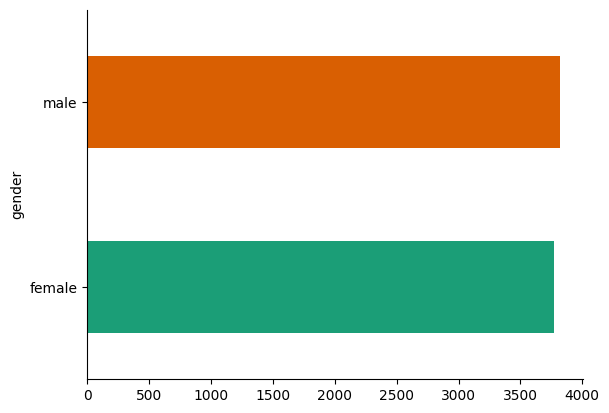

In [ ]:
# Gender Barplot
df.groupby('gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

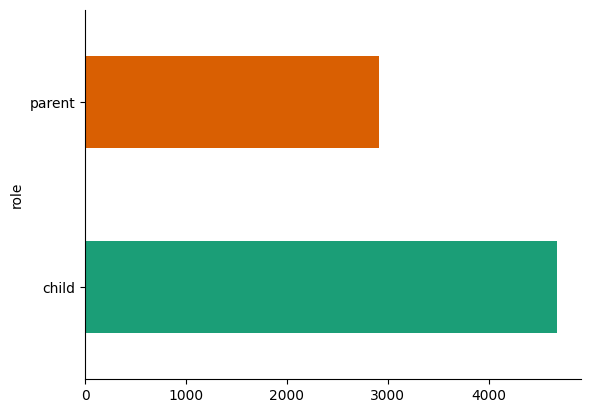

In [ ]:
# Role Barplot
df.groupby('role').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

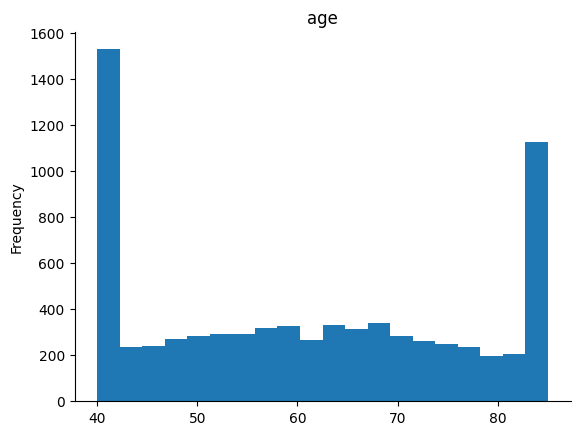

In [ ]:
# Age Histogram
df['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

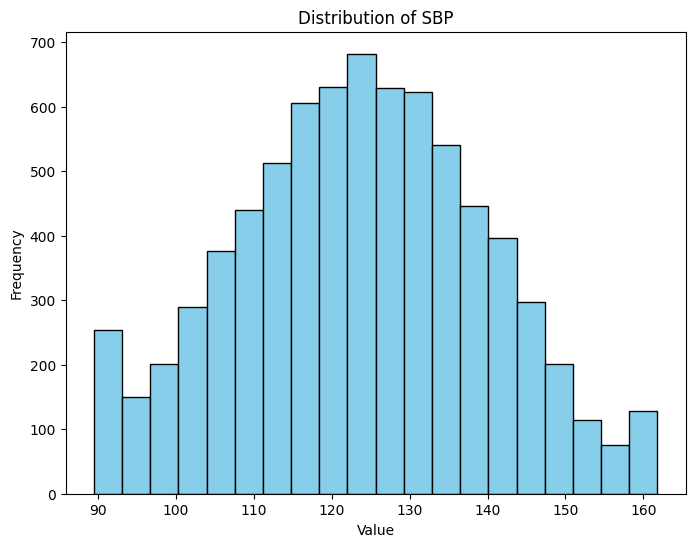

In [ ]:
# Distribution of SBP
plt.figure(figsize=(8, 6))
plt.hist(df['SBP'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of SBP')
plt.show()

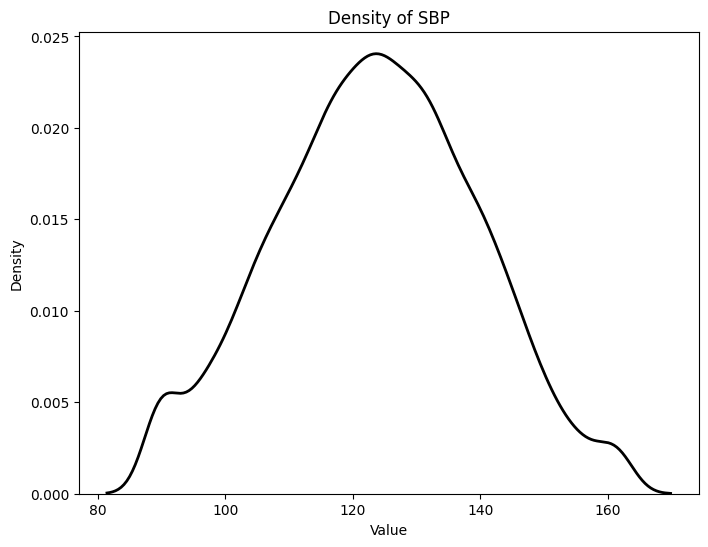

In [ ]:
# Density of SBP
plt.figure(figsize=(8, 6))
sns.kdeplot(df['SBP'], color='black', linewidth=2)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Density of SBP')
plt.show()

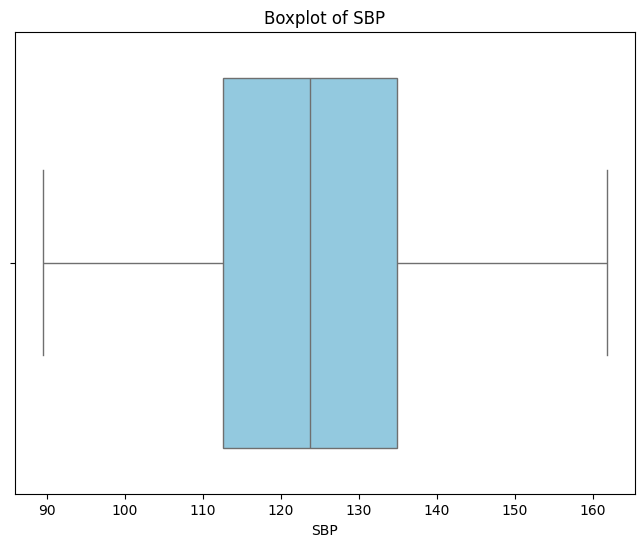

In [ ]:
# Boxplot for the SBP
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['SBP'], color='skyblue')
plt.xlabel('SBP')
plt.title('Boxplot of SBP')
plt.show()

# **Linear Regression**

**Creating mean_df**

In [ ]:
# Group the DataFrame by family_id and role
grouped = df.groupby(['family_id', 'role'])
# Calculate the mean for each group
mean_df = grouped.agg({'age': 'mean', 'height': 'mean', 'weight': 'mean', 'SBP': 'mean', 'DBP': 'mean', 'Cholesterol': 'mean', 'BMI':'mean'}).round(2)
# Display the mean metrics
mean_df

age  height  weight     SBP    DBP  Cholesterol    BMI
family_id role                                                            
1         child   62.01  167.08   62.58  119.41  72.58       183.79  22.40
          parent  73.48  161.80   62.32  129.92  82.41       167.84  23.80
2         child   66.83  162.49   61.54  117.74  81.52       172.25  23.24
          parent  53.08  159.29   63.82  120.72  85.61       200.96  25.06
3         child   66.40  159.38   63.15  114.89  75.36       153.88  24.78
...                 ...     ...     ...     ...    ...          ...    ...
1889      parent  47.44  171.04   72.12  135.31  75.05       220.93  24.65
1890      child   59.90  164.05   68.30  130.32  80.68       196.56  25.43
          parent  52.10  168.99   63.75  121.77  87.53       183.06  22.32
1891      child   70.35  156.75   58.79  123.28  78.22       182.29  23.96
          parent  74.39  160.87   61.64  100.26  70.35       204.32  23.82

[3782 rows x 7 columns]

In the first approach, we are going to apply linear regression on each of these CVD risk factors in order to detect a possible correlations between parents and their children.

**BMI Heritability**

Mean Squared Error: 4.310114382333879


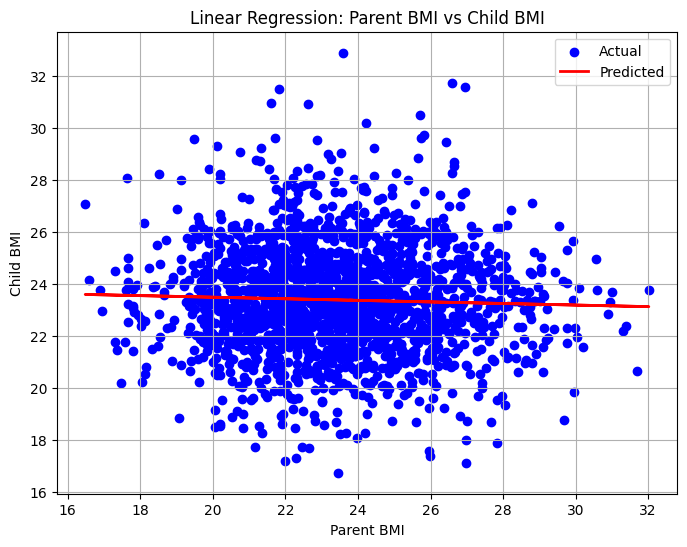

Slope of the linear regression line (BMI): [-0.03021304]


In [ ]:
# Extract parent and child BMI into separate DataFrames
parent_df = mean_df.xs('parent', level='role')
child_df = mean_df.xs('child', level='role')

# Merge parent and child DataFrames based on family ID
merged_df = parent_df.merge(child_df, on='family_id', suffixes=('_parent', '_child'))

# Perform linear regression
X_bmi = merged_df['BMI_parent'].values.reshape(-1, 1)
y_bmi = merged_df['BMI_child'].values.reshape(-1, 1)

# Add intercept term to features (add a column of ones)
X_bmi_with_intercept = np.c_[np.ones(X_bmi.shape[0]), X_bmi]

# Compute the parameters theta using the normal equation
theta_BMI = np.linalg.inv(X_bmi_with_intercept.T.dot(X_bmi_with_intercept)).dot(X_bmi_with_intercept.T).dot(y_bmi)

# Make predictions on the testing set
y_pred_bmi = X_bmi_with_intercept.dot(theta_BMI)

# Calculate mean squared error
mse = np.mean((y_pred_bmi - y_bmi) ** 2)
print("Mean Squared Error:", mse)

# Plot the regression line
plt.figure(figsize=(8, 6))
plt.scatter(X_bmi, y_bmi, color='blue', label='Actual')
plt.plot(X_bmi, y_pred_bmi, color='red', linewidth=2, label='Predicted')
plt.xlabel("Parent BMI")
plt.ylabel("Child BMI")
plt.title("Linear Regression: Parent BMI vs Child BMI")
plt.legend()
plt.grid(True)
plt.show()
slope_BMI = theta_BMI[1]
print("Slope of the linear regression line (BMI):", slope_BMI)

**SBP Heritability**

Mean Squared Error (SBP): 120.73202821555277


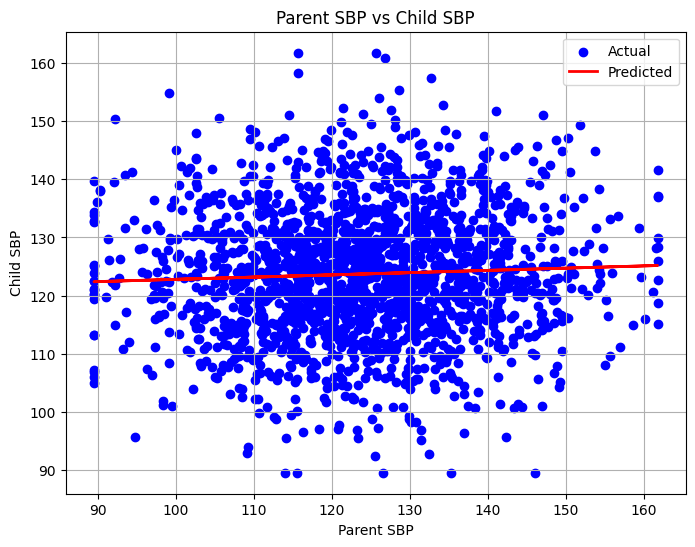

Slope of the linear regression line (SBP): [0.03857063]


In [ ]:
# Extract parent and child SBP into separate DataFrames
parent_sbp_df = mean_df.xs('parent', level='role')
child_sbp_df = mean_df.xs('child', level='role')

# Merge parent and child SBP DataFrames based on family ID
merged_sbp_df = parent_sbp_df.merge(child_sbp_df, on='family_id', suffixes=('_parent', '_child'))

# Perform linear regression
X_sbp = merged_sbp_df['SBP_parent'].values.reshape(-1, 1)
y_sbp = merged_sbp_df['SBP_child'].values.reshape(-1, 1)

# Add intercept term to features (add a column of ones)
X_sbp_with_intercept = np.c_[np.ones(X_sbp.shape[0]), X_sbp]

# Compute the parameters theta using the normal equation
theta_sbp = np.linalg.inv(X_sbp_with_intercept.T.dot(X_sbp_with_intercept)).dot(X_sbp_with_intercept.T).dot(y_sbp)

# Make predictions on the testing set
y_pred_sbp = X_sbp_with_intercept.dot(theta_sbp)

# Calculate mean squared error
mse_sbp = np.mean((y_pred_sbp - y_sbp) ** 2)
print("Mean Squared Error (SBP):", mse_sbp)

# Plot the regression line
plt.figure(figsize=(8, 6))
plt.scatter(X_sbp, y_sbp, color='blue', label='Actual')
plt.plot(X_sbp, y_pred_sbp, color='red', linewidth=2, label='Predicted')
plt.xlabel("Parent SBP")
plt.ylabel("Child SBP")
plt.title("Parent SBP vs Child SBP")
plt.legend()
plt.grid(True)
plt.show()
slope_sbp = theta_sbp[1]
print("Slope of the linear regression line (SBP):", slope_sbp)

**DBP Heritability**

Mean Squared Error (DBP): 45.226011259095884


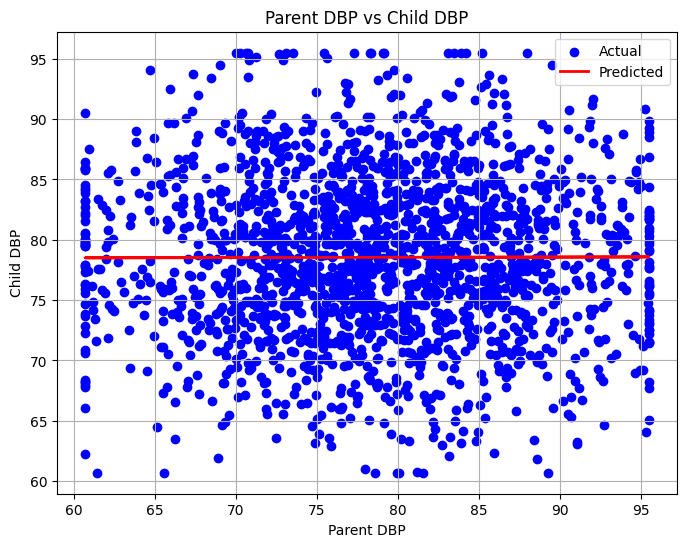

Slope of the linear regression line (DBP): [0.00222503]


In [ ]:
# Extract parent and child DBP into separate DataFrames
parent_dbp_df = mean_df.xs('parent', level='role')
child_dbp_df = mean_df.xs('child', level='role')

# Merge parent and child DBP DataFrames based on family ID
merged_dbp_df = parent_dbp_df.merge(child_dbp_df, on='family_id', suffixes=('_parent', '_child'))

# Perform linear regression
X_dbp = merged_dbp_df['DBP_parent'].values.reshape(-1, 1)
y_dbp = merged_dbp_df['DBP_child'].values.reshape(-1, 1)

# Add intercept term to features (add a column of ones)
X_dbp_with_intercept = np.c_[np.ones(X_dbp.shape[0]), X_dbp]

# Compute the parameters theta using the normal equation
theta_dbp = np.linalg.inv(X_dbp_with_intercept.T.dot(X_dbp_with_intercept)).dot(X_dbp_with_intercept.T).dot(y_dbp)

# Make predictions on the testing set
y_pred_dbp = X_dbp_with_intercept.dot(theta_dbp)

# Calculate mean squared error
mse_dbp = np.mean((y_pred_dbp - y_dbp) ** 2)
print("Mean Squared Error (DBP):", mse_dbp)

# Plot the regression line
plt.figure(figsize=(8, 6))
plt.scatter(X_dbp, y_dbp, color='blue', label='Actual')
plt.plot(X_dbp, y_pred_dbp, color='red', linewidth=2, label='Predicted')
plt.xlabel("Parent DBP")
plt.ylabel("Child DBP")
plt.title("Parent DBP vs Child DBP")
plt.legend()
plt.grid(True)
plt.show()

# Extract the slope (coefficient) from the parameter vector
slope_dbp = theta_dbp[1]

print("Slope of the linear regression line (DBP):", slope_dbp)


**Cholesterol Heritability**

Mean Squared Error (Cholesterol): 523.0519556596581


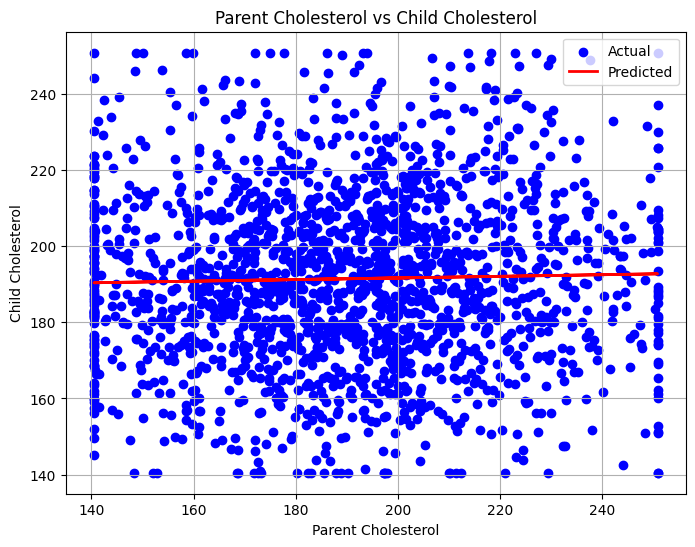

Slope of the linear regression line (Cholesterol): [0.02126588]


In [ ]:
# Extract parent and child cholesterol into separate DataFrames
parent_cholesterol_df = mean_df.xs('parent', level='role')
child_cholesterol_df = mean_df.xs('child', level='role')

# Merge parent and child cholesterol DataFrames based on family ID
merged_cholesterol_df = parent_cholesterol_df.merge(child_cholesterol_df, on='family_id', suffixes=('_parent', '_child'))

# Perform linear regression
X_cholesterol = merged_cholesterol_df['Cholesterol_parent'].values.reshape(-1, 1)
y_cholesterol = merged_cholesterol_df['Cholesterol_child'].values.reshape(-1, 1)

# Add intercept term to features (add a column of ones)
X_cholesterol_with_intercept = np.c_[np.ones(X_cholesterol.shape[0]), X_cholesterol]

# Compute the parameters theta using the normal equation
theta_cholesterol = np.linalg.inv(X_cholesterol_with_intercept.T.dot(X_cholesterol_with_intercept)).dot(X_cholesterol_with_intercept.T).dot(y_cholesterol)

# Make predictions on the testing set
y_pred_cholesterol = X_cholesterol_with_intercept.dot(theta_cholesterol)

# Calculate mean squared error
mse_cholesterol = np.mean((y_pred_cholesterol - y_cholesterol) ** 2)
print("Mean Squared Error (Cholesterol):", mse_cholesterol)

# Plot the regression line
plt.figure(figsize=(8, 6))
plt.scatter(X_cholesterol, y_cholesterol, color='blue', label='Actual')
plt.plot(X_cholesterol, y_pred_cholesterol, color='red', linewidth=2, label='Predicted')
plt.xlabel("Parent Cholesterol")
plt.ylabel("Child Cholesterol")
plt.title("Parent Cholesterol vs Child Cholesterol")
plt.legend()
plt.grid(True)
plt.show()

# Extract the slope (coefficient) from the parameter vector
slope_cholesterol = theta_cholesterol[1]

print("Slope of the linear regression line (Cholesterol):", slope_cholesterol)


The slope value indicates the Heritability coefficient.
The obtained slope values of these CVD risk factors are small and even negative (the case of BMI), which indicates a small or the absence of heritability.  

#**Gradient_descent**

In this second approach, i'm going to perform the gradient_descent method on the previous linear regression models to optimize the results we obtained before.

**Defining gradient_descent function to perform gradient_descent optimization for linear regression**

In [ ]:
import numpy as np

def gradient_descent(X, y, alpha=0.00001, iterations=1000000):

    m = len(y)  # Number of training examples
    theta = np.zeros((X.shape[1], 1))  # Initialize parameters to zeros
    cost_history = []  # Store history of cost function values

    for _ in range(iterations):

        h = np.dot(X, theta)


        cost = (1 / (2 * m)) * np.sum((h - y) ** 2)
        cost_history.append(cost)

        # Update parameters using gradient descent
        gradient = (1 / m) * np.dot(X.T, (h - y))
        theta -= alpha * gradient

    return theta, cost_history

**Perform gradient_descent for BMI**

In [ ]:
theta_bmi_opt, cost_bmi = gradient_descent(X_bmi_with_intercept, y_bmi)
print("Optimized parameters (BMI):", theta_bmi_opt)

Optimized parameters (BMI): [[2.60720714]
 [0.87784758]]


In [ ]:
# Extract the slope (Heritability coefficient) from the parameter vector
slope_bmi = theta_bmi_opt[1]

print("Slope of the new line (BMI):", slope_bmi)

Slope of the new line (BMI): [0.87784758]


**Perform gradient_descent for SBP**

In [ ]:
theta_sbp_opt, cost_sbp = gradient_descent(X_sbp_with_intercept, y_sbp)
print("Optimized parameters (SBP):", theta_sbp_opt)

Optimized parameters (SBP): [[13.79755197]
 [ 0.8772473 ]]


In [ ]:
# Extract the slope (Heritability coefficient) from the parameter vector
slope_sbp = theta_sbp_opt[1]

print("Slope of the new line (SBP):", slope_sbp)

Slope of the new line (SBP): [0.8772473]


**Perform gradient_descent for DBP**




In [ ]:
theta_dbp_opt, cost_dbp = gradient_descent(X_dbp_with_intercept, y_dbp)
print("Optimized parameters (DBP):", theta_dbp_opt)

Optimized parameters (DBP): [[8.11146376]
 [0.88653495]]


In [ ]:
# Extract the slope (Heritability coefficient) from the parameter vector
slope_dbp = theta_dbp_opt[1]

print("Slope of the new line (DBP):", slope_dbp)

Slope of the new line (DBP): [0.88653495]


**Perform gradient_descent for Cholesterol**


In [ ]:
theta_cholesterol_opt, cost_cholesterol = gradient_descent(X_cholesterol_with_intercept, y_cholesterol)
print("Optimized parameters (Cholesterol):", theta_cholesterol_opt)

Optimized parameters (Cholesterol): [[35.24130692]
 [ 0.80572851]]


In [ ]:
# Extract the slope (Heritability coefficient) from the parameter vector
slope_dbp = theta_dbp_opt[1]

print("Slope of the new line (Cholesterol):", slope_cholesterol)

Slope of the new line (Cholesterol): [0.02126588]


The slope values (Heritability coefficient) increased in comparison with what i got at first. However, they're still not big enough to conclude definitively about the presence of heritability in the CVD risk factors. This problem may get solved if we try another model that fits better the data distribution.